## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.118534 -0.254181  0.924662 -1.363047 -1.319145 -0.620340
1  0.720796 -0.603630  0.495690  1.161657  1.469855  1.155255
2 -0.684566 -0.148695  1.071533 -0.083547 -0.934579 -0.464895
3  0.760530 -0.662981  0.263214 -1.762252 -1.238623 -1.492163
4  0.612684 -0.054108 -0.236670 -0.747284  0.690629  0.105919


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9163785	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9068115	total: 69.4ms	remaining: 34.6s
2:	learn: 0.8973826	total: 69.9ms	remaining: 23.2s
3:	learn: 0.8880119	total: 70.5ms	remaining: 17.6s
4:	learn: 0.8791490	total: 71.3ms	remaining: 14.2s
5:	learn: 0.8703049	total: 71.9ms	remaining: 11.9s
6:	learn: 0.8596210	total: 72.4ms	remaining: 10.3s
7:	learn: 0.8499954	total: 73ms	remaining: 9.05s
8:	learn: 0.8419396	total: 73.5ms	remaining: 8.1s
9:	learn: 0.8336107	total: 74.2ms	remaining: 7.34s
10:	learn: 0.8243643	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8145667	total: 75.2ms	remaining: 6.19s
12:	learn: 0.8052885	total: 75.7ms	remaining: 5.75s
13:	learn: 0.7961529	total: 76.2ms	remaining: 5.36s
14:	learn: 0.7894033	total: 76.7ms	remaining: 5.04s
15:	learn: 0.7821498	total: 77.2ms	remaining: 4.75s
16:	learn: 0.7742757	total: 77.7ms	remaining: 4.49s
17:	learn: 0.7663260	total: 78.3ms	remaining: 4.27s
18:	learn: 0.7578672	total: 78.7ms	remaining: 4

81:	learn: 0.4291799	total: 109ms	remaining: 1.22s
82:	learn: 0.4252949	total: 109ms	remaining: 1.21s
83:	learn: 0.4218416	total: 110ms	remaining: 1.2s
84:	learn: 0.4185724	total: 110ms	remaining: 1.19s
85:	learn: 0.4155822	total: 111ms	remaining: 1.17s
86:	learn: 0.4121823	total: 111ms	remaining: 1.16s
87:	learn: 0.4090044	total: 111ms	remaining: 1.15s
88:	learn: 0.4052383	total: 112ms	remaining: 1.14s
89:	learn: 0.4020429	total: 112ms	remaining: 1.13s
90:	learn: 0.3994105	total: 113ms	remaining: 1.12s
91:	learn: 0.3957699	total: 113ms	remaining: 1.11s
92:	learn: 0.3922170	total: 113ms	remaining: 1.1s
93:	learn: 0.3891402	total: 114ms	remaining: 1.1s
94:	learn: 0.3860659	total: 114ms	remaining: 1.09s
95:	learn: 0.3833016	total: 115ms	remaining: 1.08s
96:	learn: 0.3804841	total: 115ms	remaining: 1.07s
97:	learn: 0.3775996	total: 116ms	remaining: 1.06s
98:	learn: 0.3749229	total: 116ms	remaining: 1.05s
99:	learn: 0.3719553	total: 116ms	remaining: 1.05s
100:	learn: 0.3695573	total: 117ms

250:	learn: 0.1266068	total: 187ms	remaining: 558ms
251:	learn: 0.1257286	total: 188ms	remaining: 557ms
252:	learn: 0.1250322	total: 188ms	remaining: 555ms
253:	learn: 0.1242324	total: 188ms	remaining: 554ms
254:	learn: 0.1234926	total: 189ms	remaining: 552ms
255:	learn: 0.1226685	total: 189ms	remaining: 550ms
256:	learn: 0.1218098	total: 190ms	remaining: 549ms
257:	learn: 0.1209849	total: 190ms	remaining: 547ms
258:	learn: 0.1200587	total: 191ms	remaining: 545ms
259:	learn: 0.1192771	total: 191ms	remaining: 543ms
260:	learn: 0.1185348	total: 191ms	remaining: 542ms
261:	learn: 0.1178276	total: 193ms	remaining: 543ms
262:	learn: 0.1174392	total: 193ms	remaining: 541ms
263:	learn: 0.1166973	total: 194ms	remaining: 540ms
264:	learn: 0.1160714	total: 194ms	remaining: 538ms
265:	learn: 0.1153954	total: 194ms	remaining: 536ms
266:	learn: 0.1148783	total: 195ms	remaining: 534ms
267:	learn: 0.1142655	total: 195ms	remaining: 533ms
268:	learn: 0.1134617	total: 196ms	remaining: 531ms
269:	learn: 

461:	learn: 0.0480994	total: 292ms	remaining: 340ms
462:	learn: 0.0480571	total: 292ms	remaining: 339ms
463:	learn: 0.0479837	total: 293ms	remaining: 338ms
464:	learn: 0.0476922	total: 293ms	remaining: 338ms
465:	learn: 0.0476512	total: 294ms	remaining: 337ms
466:	learn: 0.0473684	total: 294ms	remaining: 336ms
467:	learn: 0.0472973	total: 295ms	remaining: 335ms
468:	learn: 0.0471030	total: 295ms	remaining: 334ms
469:	learn: 0.0470634	total: 296ms	remaining: 333ms
470:	learn: 0.0467886	total: 296ms	remaining: 332ms
471:	learn: 0.0466575	total: 296ms	remaining: 331ms
472:	learn: 0.0465576	total: 297ms	remaining: 330ms
473:	learn: 0.0462655	total: 297ms	remaining: 330ms
474:	learn: 0.0461978	total: 297ms	remaining: 329ms
475:	learn: 0.0460721	total: 298ms	remaining: 328ms
476:	learn: 0.0460348	total: 298ms	remaining: 327ms
477:	learn: 0.0457132	total: 299ms	remaining: 326ms
478:	learn: 0.0454496	total: 299ms	remaining: 326ms
479:	learn: 0.0453540	total: 300ms	remaining: 325ms
480:	learn: 

626:	learn: 0.0242721	total: 371ms	remaining: 221ms
627:	learn: 0.0241668	total: 372ms	remaining: 220ms
628:	learn: 0.0240642	total: 372ms	remaining: 220ms
629:	learn: 0.0239663	total: 373ms	remaining: 219ms
630:	learn: 0.0239106	total: 373ms	remaining: 218ms
631:	learn: 0.0238670	total: 374ms	remaining: 218ms
632:	learn: 0.0237796	total: 374ms	remaining: 217ms
633:	learn: 0.0237367	total: 375ms	remaining: 216ms
634:	learn: 0.0236512	total: 375ms	remaining: 216ms
635:	learn: 0.0235571	total: 375ms	remaining: 215ms
636:	learn: 0.0234915	total: 376ms	remaining: 214ms
637:	learn: 0.0234123	total: 376ms	remaining: 213ms
638:	learn: 0.0233027	total: 377ms	remaining: 213ms
639:	learn: 0.0232257	total: 377ms	remaining: 212ms
640:	learn: 0.0231188	total: 377ms	remaining: 211ms
641:	learn: 0.0230222	total: 378ms	remaining: 211ms
642:	learn: 0.0229703	total: 378ms	remaining: 210ms
643:	learn: 0.0228661	total: 378ms	remaining: 209ms
644:	learn: 0.0228253	total: 379ms	remaining: 209ms
645:	learn: 

840:	learn: 0.0121171	total: 476ms	remaining: 90ms
841:	learn: 0.0120654	total: 477ms	remaining: 89.5ms
842:	learn: 0.0120096	total: 477ms	remaining: 88.9ms
843:	learn: 0.0119527	total: 478ms	remaining: 88.3ms
844:	learn: 0.0119205	total: 478ms	remaining: 87.8ms
845:	learn: 0.0118650	total: 479ms	remaining: 87.2ms
846:	learn: 0.0118107	total: 479ms	remaining: 86.6ms
847:	learn: 0.0117575	total: 480ms	remaining: 86ms
848:	learn: 0.0117389	total: 480ms	remaining: 85.5ms
849:	learn: 0.0116841	total: 481ms	remaining: 84.9ms
850:	learn: 0.0116308	total: 481ms	remaining: 84.3ms
851:	learn: 0.0116127	total: 482ms	remaining: 83.7ms
852:	learn: 0.0115593	total: 482ms	remaining: 83.1ms
853:	learn: 0.0115316	total: 483ms	remaining: 82.5ms
854:	learn: 0.0114844	total: 483ms	remaining: 82ms
855:	learn: 0.0114323	total: 484ms	remaining: 81.4ms
856:	learn: 0.0113878	total: 484ms	remaining: 80.8ms
857:	learn: 0.0113662	total: 485ms	remaining: 80.2ms
858:	learn: 0.0113203	total: 485ms	remaining: 79.6ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

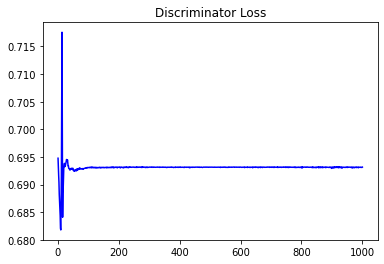

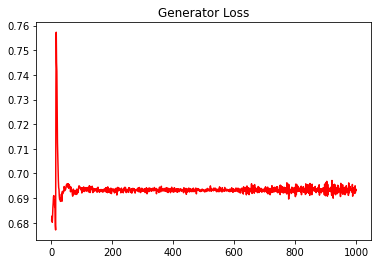

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.34789166250851056


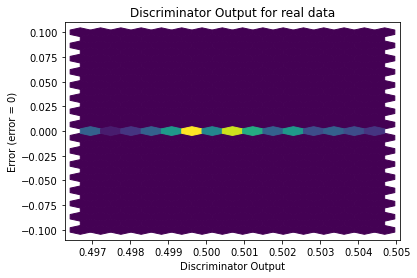

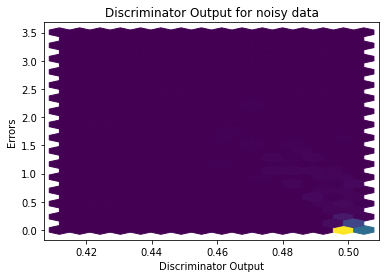

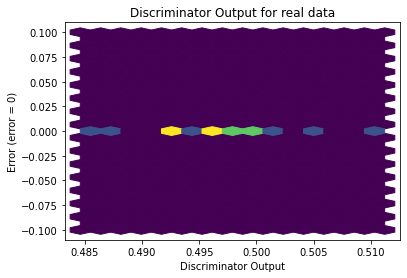

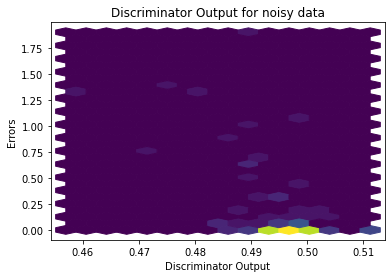

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


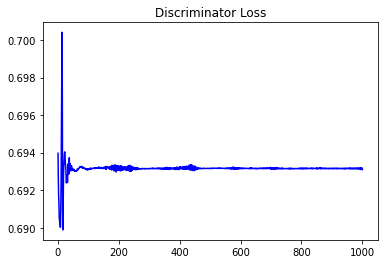

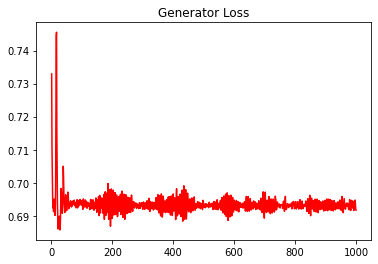

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.37633012464433324


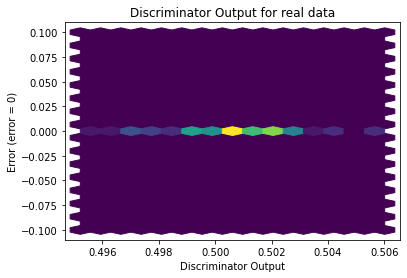

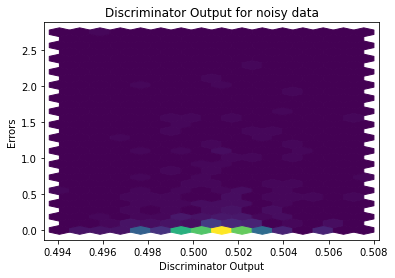

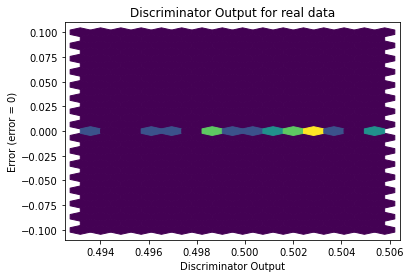

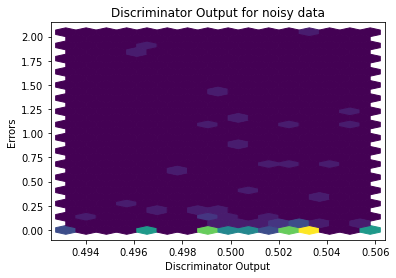

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1697]], requires_grad=True)
